In [29]:
import matplotlib.pyplot as plt
import matplotlib
import mpld3
import numpy as np
import pandas as pd
from sympy import Eq, Symbol, solve

%matplotlib inline

In [151]:
import astropy.units as u
from astropy.constants import G, c, M_jup, M_sun, m_e, k_B, h, N_A, m_p


## Number 3

In [326]:
T=4e4*u.K
rho=1e-6*u.g/(u.cm**3.)

def nqe(T):
    return (2.*np.pi*m_e*k_B*T*h**-2.)**(3./2.)

def n(rho):
    return rho*N_A/(4.0*u.g/u.mol)

def a(T,rho):
    return 4.*(nqe(T)/n(rho))*np.e**(-24.6*u.eV/(k_B*T))

def b(T,rho):
    return (nqe(T)/n(rho))*np.e**(-54.4*u.eV/(k_B*T))

print (k_B*T).to(u.eV)
print nqe(T).decompose()
print n(rho).decompose()
print 'aa = ', a(T,rho).decompose().value
print 'bb = ', b(T,rho).decompose().value

print [a(x,rho).decompose().value for x in Ts]
print [b(x,rho).decompose().value for x in Ts]

3.44693295398 eV
1.93174626742e+28 1 / m3
1.5055353225e+23 1 / m3
aa =  408.183292356
bb =  0.0179539537762
[408.18329235573543, 8093.69335082369, 40938.52277764868, 116800.19746981694, 247084.9952266633, 437381.16416315275, 689514.0751680048, 1003155.2238099071]
[0.01795395377620164, 6.353260573206851, 135.75461771208526, 919.4529987885445, 3461.316701853428, 9247.98657241921, 19852.918605421324, 36723.560856526194]


In [330]:
np.e**(-9)

0.00012340980408667962

In [ ]:
Ts=np.arange(4,20,2)*1e4*u.K
print 'temp:', Ts
#Ts=np.logspace(1,2.4,num=10)*1e3*u.K
#Ts=[4e4*u.K]
rho=1e-6*u.g/(u.cm**3)

x1s=[]
x2s=[]
ys=[]
for T in Ts:
    aa=a(T,rho).decompose().value
    bb=b(T,rho).decompose().value

    print 'aa: ', aa
    print 'bb: ', bb
    
    x = Symbol('x')
    #eqn = Eq( (x**2+bb)**0.5 , -aa*0.5+(2.*x**2.-2.*x*(x**2.+bb)**0.5+bb-aa+aa**2./4.)**0.5 )
    #eqn2 = Eq( x**2. - ((2.*x+aa)*(x**2.+bb*x)**0.5) + aa , 0.0 )
    eqn2 = Eq( 0.75*x+(x**2/16.+bb*x/2.)**0.5+aa/2. ,\
              (x**2./8. - (x/2.*(x**2/16.+bb*x/2.)**0.5) + bb*x/2. + aa + (aa**2)/2.)**0.5 )

    print "solving the equation..."
    y=solve(eqn2)

    print y
    x1=y[0]
    x2=-x1+(x1**2+bb)**0.5
#    print x1, x2
    x1s.append(x1)
    x2s.append(x2)
    ys.append(y)

In [187]:
#Ts=np.logspace(1,2.4,num=10)*1e3*u.K
#Ts=np.arange(4,20,2)*1e4*u.K
Ts=np.logspace(1,2.4,num=10)*1e3*u.K
Ts

<Quantity [  10000.        ,  14307.22989194,  20469.68271808,
             29286.44564625,  41900.79105787,  59948.42503189,
             85769.58985909, 122712.52398512, 175567.6291275 ,
            251188.64315096] K>

temp: [  40000.   60000.   80000.  100000.  120000.  140000.  160000.  180000.] K
[ 0.98022235  0.01734044]
-----
[ 0.21893672  0.7810151 ]
-----
[ 0.49999  0.49999]
-----
[  1.00000000e-05   1.00000000e-05]
-----
[ 0.00280747 -0.01455301]
-----
[  5.00000000e-05   5.00000000e-05]
-----
[  4.99983226e-05   6.48241005e-01]
-----
[  4.99965933e-05   6.38392294e-01]
-----


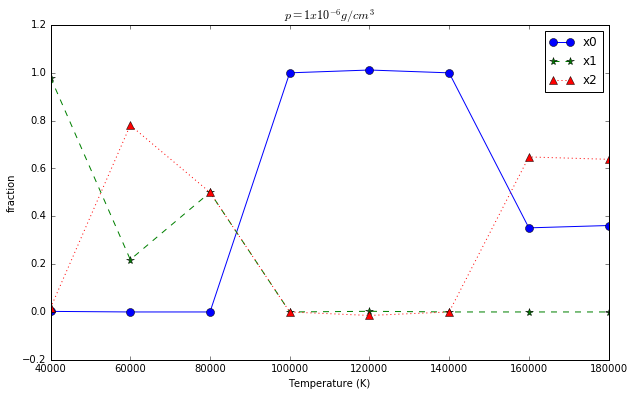

In [504]:
from scipy.optimize import fsolve
import math

fig = plt.subplots(1, figsize=(10,6))

Ts=np.arange(4,20,2)*1e4*u.K
print 'temp:', Ts
rho=1e-6*u.g/(u.cm**3)

def equations(p, *data):
    aa = data[0][0]
    bb = data[0][1]
#    print 'here: ', aa, bb
    
    x1=p[0]
    x2=p[1]
    f=np.zeros(2)
    f[0]=(x1**2+2*x1*x2)/(1-x1-x2)-aa
    f[1]=(2*x2**2+x1*x2)/(x1)-bb
    return f
    
x1s=[]
x2s=[]
ys=[]
for T in Ts:
    aa=a(T,rho).decompose().value
    bb=b(T,rho).decompose().value
    #print 'aa:', aa
    #print 'bb:', bb
    
    data=[aa,bb]
    
    if T < 90000*u.K:
        g=0.49999
    elif T>90000*u.K and T < 130000*u.K:
        #g=0.59999
        g=0.00001
    else:
        g=0.00005
    
    z=fsolve(equations,[g,g],args=data)
    print z
    ys.append(z)
    print '-----'

plt.plot(Ts,np.zeros(len(ys))+1.-np.array(ys).T[0]-np.array(ys).T[1],'o-',label='x0',markersize=8)
plt.plot(Ts,np.array(ys).T[0],'*--',label='x1',markersize=8)
plt.plot(Ts,np.array(ys).T[1],'^:',label='x2',markersize=8)
plt.xlabel('Temperature (K)')
plt.ylabel('fraction')
#plt.yscale('log')
#plt.xscale('log')
plt.legend(loc='best')
plt.title('$p=1x10^{-6} g/cm^3$')

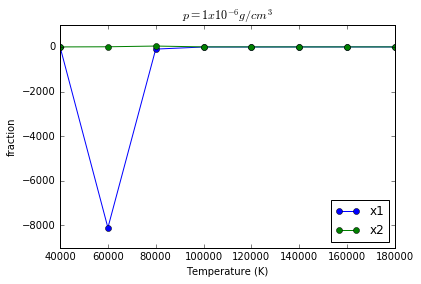

In [393]:
#plt.plot(Ts,x0s,'o-',label='x0')
plt.plot(Ts,np.array(ys).T[0],'o-',label='x1')
plt.plot(Ts,np.array(ys).T[1],'o-',label='x2')
plt.xlabel('Temperature (K)')
plt.ylabel('fraction')
#plt.yscale('log')
#plt.xscale('log')
plt.legend(loc='best')
plt.title('$p=1x10^{-6} g/cm^3$')

In [244]:
from sympy.functions import re
x1s=[re(y[-1]) for y in ys]
print rho
print x1s
x2s=[ (-x1+(x1**2+b(T,rho).decompose().value)**0.5) for x1, T in zip(x1s, Ts)]
#x2=-x1+(x1**2+bb)**0.5
#[ b(T,rho).decompose().value for x1, T in zip(x1s, Ts)]
#[ for x1, T in zip(x1s, Ts)]

1e-06 g / cm3
[0.990669406699038, 0.288517562573530, 0.0147292255638386, 0.00217519573271803, 0.000577814591130613, 0.000216263278810844, 0.000100740854134105, 5.44609494981469e-5]


In [245]:
x1s
x2s

[0.00452044968894028,
 1.51699418496975,
 8.22405259010092,
 21.4390585403597,
 41.6006042751114,
 67.9997343709413,
 99.6315172462127,
 135.505592758146]

In [246]:
x0s=np.zeros(len(x1s))+1.-x1s-x2s
x0s

array([0.00481014361202148, -0.805511747543282, -7.23878181566476,
       -20.4412337360924, -40.6011820897025, -66.9999506342201,
       -98.6316179870668, -134.505647219096], dtype=object)

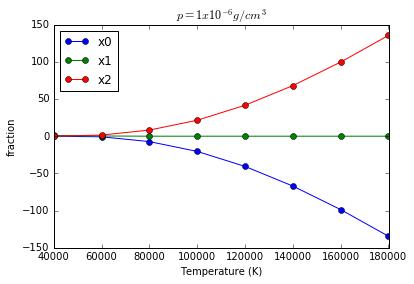

In [251]:
plt.plot(Ts,x0s,'o-',label='x0')
plt.plot(Ts,x1s,'o-',label='x1')
plt.plot(Ts,x2s,'o-',label='x2')
plt.xlabel('Temperature (K)')
plt.ylabel('fraction')
#plt.yscale('log')
#plt.xscale('log')
plt.legend(loc='best')
plt.title('$p=1x10^{-6} g/cm^3$')

In [ ]:
plt.plot(Ts,x1s,'o-',label='x1')
plt.plot(Ts,x2s,'o-',label='x2')
plt.xlabel('Temperature (K)')
plt.ylabel('fraction')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.title('$p=1x10^{-6} g/cm^3$')